In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob


Bad key "text.kerning_factor" on line 4 in
/home/tribiosis/miniconda3/envs/plt2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
plt.style.use('seaborn-white')

### PXD000561

In [3]:
def extract_int_ratios_TIC(file):
    f = open(file)
    i = 0
    for line in f:
        i+=1
        if i == 1:
            intensity_ratios = [float(value.strip()) for value in line.split(",")[:-1]]
    return intensity_ratios

In [4]:
def extract_int_ratios_highestpeak(file):
    f = open(file)
    i = 0
    for line in f:
        i+=1
        if i == 2:
            intensity_ratios = [float(value.strip()) for value in line.split(",")[:-1]]
    return intensity_ratios

In [5]:
TIC_intensity_ratios_01 = extract_int_ratios_TIC("Adult_CD8Tcells_Gel_Elite_44_concat_precrem01Da_ratios.txt")
TIC_intensity_ratios_02 = extract_int_ratios_TIC("Adult_CD8Tcells_Gel_Elite_44_concat_precrem02Da_ratios.txt")
TIC_intensity_ratios_05 = extract_int_ratios_TIC("Adult_CD8Tcells_Gel_Elite_44_concat_precrem05Da_ratios.txt")

In [6]:
len(TIC_intensity_ratios_01)

406913

Text(0.5,1,'Histogram of intensity ratios PXD000561')

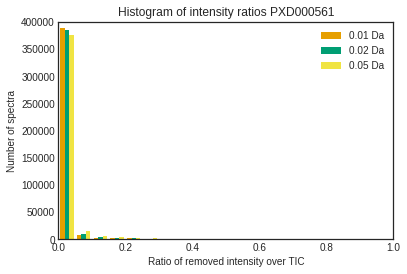

In [19]:
colors = ['#E69F00', '#009E73', '#F0E442']
names = ['0.01 Da', '0.02 Da', '0.05 Da']
plt.hist([TIC_intensity_ratios_01, TIC_intensity_ratios_02, TIC_intensity_ratios_05], bins = 20, stacked=False, color = colors, label=names)
plt.ylim(0.0, 400000)
plt.xlim(0,1)
plt.legend()
plt.xlabel('Ratio of removed intensity over TIC')
plt.ylabel('Number of spectra')
plt.title('Histogram of intensity ratios PXD000561')

Text(0.5,1,'Histogram of intensity ratios PXD000561')

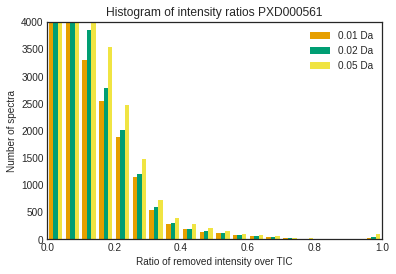

In [15]:
# Repeated but with zoom
colors = ['#E69F00', '#009E73', '#F0E442']
names = ['0.01 Da', '0.02 Da', '0.05 Da']
plt.hist([TIC_intensity_ratios_01, TIC_intensity_ratios_02, TIC_intensity_ratios_05], bins = 20, stacked=False, color = colors, label=names)
plt.ylim(0.0, 4000) # 406913 spectra in total / 100 = 4000
plt.xlim(0,1)
plt.legend()
plt.xlabel('Ratio of removed intensity over TIC')
plt.ylabel('Number of spectra')
plt.title('Histogram of intensity ratios PXD000561')

In [16]:
intensity_ratios_01 = extract_int_ratios_highestpeak("Adult_CD8Tcells_Gel_Elite_44_concat_precrem01Da_ratios.txt")
intensity_ratios_02 = extract_int_ratios_highestpeak("Adult_CD8Tcells_Gel_Elite_44_concat_precrem02Da_ratios.txt")
intensity_ratios_05 = extract_int_ratios_highestpeak("Adult_CD8Tcells_Gel_Elite_44_concat_precrem05Da_ratios.txt")

Text(0.5,1,'Histogram of intensity ratios PXD000561')

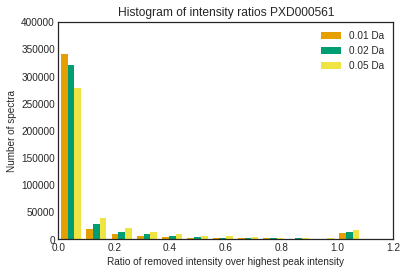

In [22]:
colors = ['#E69F00', '#009E73', '#F0E442']
names = ['0.01 Da', '0.02 Da', '0.05 Da']
plt.hist([intensity_ratios_01, intensity_ratios_02, intensity_ratios_05], bins = 30, stacked=False, color = colors, label=names)
plt.ylim(0.0, 400000)
plt.xlim(0,1.2)
plt.legend()
plt.xlabel('Ratio of removed intensity over highest peak intensity')
plt.ylabel('Number of spectra')
plt.title('Histogram of intensity ratios PXD000561')

Text(0.5,1,'Histogram of intensity ratios PXD000561')

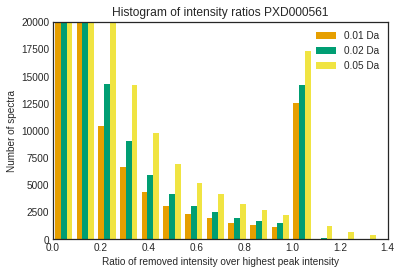

In [27]:
colors = ['#E69F00', '#009E73', '#F0E442']
names = ['0.01 Da', '0.02 Da', '0.05 Da']
plt.hist([intensity_ratios_01, intensity_ratios_02, intensity_ratios_05], bins = 30, stacked=False, color = colors, label=names)
plt.ylim(0.0, 20000)
plt.xlim(0,1.4)
plt.legend()
plt.xlabel('Ratio of removed intensity over highest peak intensity')
plt.ylabel('Number of spectra')
plt.title('Histogram of intensity ratios PXD000561')

In [28]:
column_names = ["mass_tol_err","num_spectra", "Ratio_spectra_prec_removed", "Int_removed_/_TIC", "Int_removed_/_highestpeak"]
df = pd.DataFrame(columns = column_names)
files = [f for f in glob.glob("/home/tribiosis/Master/master_thesis/prec_removed/Adult*.txt")]
for file in files:
    f = open(file)
    i = 0
    mass_tol_err = float("0.0" + file.split("_")[-2][-3])
    for line in f:
        i+=1
        if i == 3:
            total_spectra = line.strip().split("\t")[1]
        elif i == 4:
            ratio_removed = line.strip().split("\t")[1]
        elif i == 5:
            int_rem_TIC = line.strip().split("\t")[1]
        elif i == 6:
            int_rem_highest = line.strip().split("\t")[1]
            
    new_row = pd.Series(data={'mass_tol_err':mass_tol_err, 'num_spectra':int(total_spectra), 
                              'Ratio_spectra_prec_removed':float(ratio_removed),
                   'Int_removed_/_TIC': float(int_rem_TIC),'Int_removed_/_highestpeak':float(int_rem_highest)})
    df = df.append(new_row, ignore_index=True)
        

In [29]:
df

,mass_tol_err,num_spectra,Ratio_spectra_prec_removed,Int_removed_/_TIC,Int_removed_/_highestpeak
0,0.02,406913.0,0.366607,0.009828,0.082251
1,0.01,406913.0,0.269817,0.008899,0.074471
2,0.05,406913.0,0.498726,0.012065,0.100972


### PXD001468

In [30]:
intensity_ratios_01 = extract_int_ratios_TIC("concat_293T_proteinID_01A_QE3_122212_precrem01Da_ratios.txt")
intensity_ratios_02 = extract_int_ratios_TIC("concat_293T_proteinID_01A_QE3_122212_precrem02Da_ratios.txt")
intensity_ratios_05 = extract_int_ratios_TIC("concat_293T_proteinID_01A_QE3_122212_precrem05Da_ratios.txt")

Text(0.5,1,'Histogram of intensity ratios PXD001468')

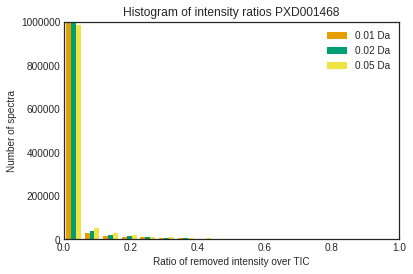

In [39]:
colors = ['#E69F00', '#009E73', '#F0E442']
names = ['0.01 Da', '0.02 Da', '0.05 Da']
plt.hist([intensity_ratios_01, intensity_ratios_02, intensity_ratios_05], bins = 15, stacked=False, color = colors, label=names)
plt.ylim(0.0, 1000000)
plt.xlim(0,1)
plt.legend()
plt.xlabel('Ratio of removed intensity over TIC')
plt.ylabel('Number of spectra')
plt.title('Histogram of intensity ratios PXD001468')

Text(0.5,1,'Histogram of intensity ratios PXD001468')

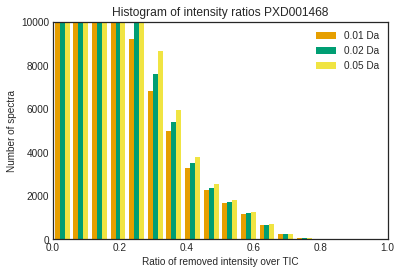

In [40]:
colors = ['#E69F00', '#009E73', '#F0E442']
names = ['0.01 Da', '0.02 Da', '0.05 Da']
plt.hist([intensity_ratios_01, intensity_ratios_02, intensity_ratios_05], bins = 15, stacked=False, color = colors, label=names)
plt.ylim(0.0, 10000)
plt.xlim(0,1)
plt.legend()
plt.xlabel('Ratio of removed intensity over TIC')
plt.ylabel('Number of spectra')
plt.title('Histogram of intensity ratios PXD001468')

In [41]:
intensity_ratios_01 = extract_int_ratios_highestpeak("concat_293T_proteinID_01A_QE3_122212_precrem01Da_ratios.txt")
intensity_ratios_02 = extract_int_ratios_highestpeak("concat_293T_proteinID_01A_QE3_122212_precrem02Da_ratios.txt")
intensity_ratios_05 = extract_int_ratios_highestpeak("concat_293T_proteinID_01A_QE3_122212_precrem05Da_ratios.txt")

In [42]:
len(intensity_ratios_01)

1121149

Text(0.5,1,'Density plot PXD001468')

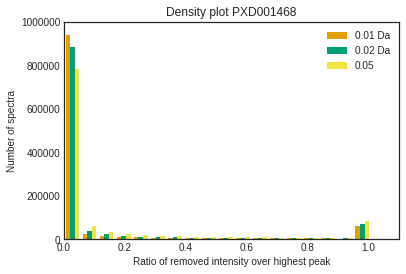

In [44]:
colors = ['#E69F00', '#009E73', '#F0E442']
names = ['0.01 Da', '0.02 Da', '0.05']
plt.hist([intensity_ratios_01, intensity_ratios_02, intensity_ratios_05], bins = 40, stacked=False, color = colors, label=names)
plt.ylim(0.0, 1000000)
plt.xlim(0,1.1)
plt.legend()
plt.xlabel('Ratio of removed intensity over highest peak')
plt.ylabel('Number of spectra')
plt.title('Density plot PXD001468')

Text(0.5,1,'Density plot PXD001468')

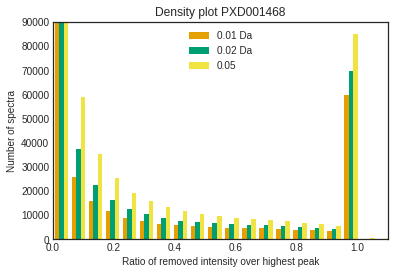

In [47]:
colors = ['#E69F00', '#009E73', '#F0E442']
names = ['0.01 Da', '0.02 Da', '0.05']
plt.hist([intensity_ratios_01, intensity_ratios_02, intensity_ratios_05], bins = 40, stacked=False, color = colors, label=names)
plt.ylim(0.0, 90000)
plt.xlim(0,1.1)
plt.legend()
plt.xlabel('Ratio of removed intensity over highest peak')
plt.ylabel('Number of spectra')
plt.title('Density plot PXD001468')

The fact that there are so many spectra with the intensity removed being equal (or higher) to the highest peak, but not ratios of 1 when dividing by TIC, means that they are not spectra of 1 peak. Otherwise the ratio of intensity removed / TIC should be also around 1. Probably are spectra with the highest peak being the precursor ion but also many other less intense peaks.

In [48]:
column_names = ["mass_tol_err","num_spectra", "Ratio_spectra_prec_removed", "Int_removed_/_TIC", "Int_removed_/_highestpeak"]
df = pd.DataFrame(columns = column_names)
files = [f for f in glob.glob("/home/tribiosis/Master/master_thesis/prec_removed/concat*.txt")]
for file in files:
    f = open(file)
    i = 0
    mass_tol_err = float("0.0" + file.split("_")[-2][-3])
    for line in f:
        i+=1
        if i == 3:
            total_spectra = line.strip().split("\t")[1]
        elif i == 4:
            ratio_removed = line.strip().split("\t")[1]
        elif i == 5:
            int_rem_TIC = line.strip().split("\t")[1]
        elif i == 6:
            int_rem_highest = line.strip().split("\t")[1]
            
    new_row = pd.Series(data={'mass_tol_err':mass_tol_err, 'num_spectra':int(total_spectra), 
                              'Ratio_spectra_prec_removed':float(ratio_removed),
                   'Int_removed_/_TIC': float(int_rem_TIC),'Int_removed_/_highestpeak':float(int_rem_highest)})
    df = df.append(new_row, ignore_index=True)
           

In [49]:
df

,mass_tol_err,num_spectra,Ratio_spectra_prec_removed,Int_removed_/_TIC,Int_removed_/_highestpeak
0,0.01,1121149.0,0.220897,0.006721,0.055732
1,0.05,1121149.0,0.432151,0.009210,0.076378
2,0.02,1121149.0,0.300208,0.007525,0.062405
